In [1]:
from settings import *
import numpy as np
from keras.utils import to_categorical
import utils as ut
import warnings
from Bio import Phylo
from Bio.Phylo.BaseTree import Tree
from matplotlib import pyplot as plt
import TreeClass
from TreeClass import Phylogenetic_Tree
import copy
import random
from data_generator import simulate_artificial_data
import MCMC 

seed = 3
np.random.seed(seed)
random.seed(seed)

c:\Users\leonm\AppData\Local\Programs\Python\Python310\lib\site-packages\Bio\__init__.py:138: BiopythonWarning: You may be importing Biopython from inside the source tree. This is bad practice and might lead to downstream issues. In particular, you might encounter ImportErrors due to missing compiled C extensions. We recommend that you try running your code from outside the source tree. If you are outside the source tree then you have a setup.py file in an unexpected directory: c:\Users\leonm\AppData\Local\Programs\Python\Python310\lib\site-packages
  warnings.warn(


## Generate artificial data

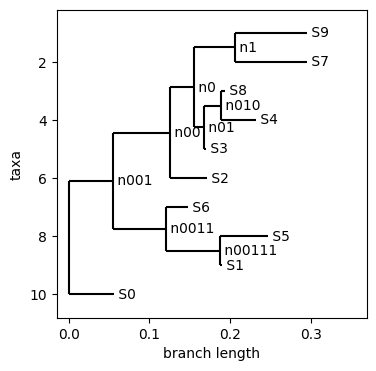

In [2]:
# Generate artificial data

seq_len = 10
n_taxa = 10
outgroup = "S0" # Outgroup fixed

exponential_params = {"distribution": "exponential", "scale": 0.1}
uniform_params = {"distribution": "uniform", "low": 0, "high": 0.1}

# true_tree, data = simulate_artificial_data(n_taxa, seq_len, outgroup, exponential_params)
true_tree, data = simulate_artificial_data(n_taxa, seq_len, outgroup, uniform_params)
taxa_names = list(data.keys())
taxa_sequences = list(data.values())

# Draw true tree
true_tree.draw()

## Perform MCMC sampling using NNI searcher

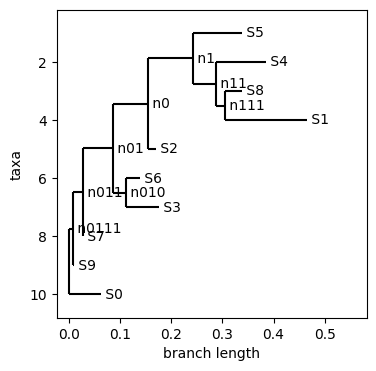

In [3]:
tree_init = MCMC.initialize_random_tree(taxa_names, taxa_sequences, outgroup, exponential_params)
tree_init.draw()

In [4]:
nsteps = 1000
burn_in = 500
save_frequency = 20
nwalkers = 3

distribution_params = exponential_params
# distribution_params = uniform_params

sampler = MCMC.Sampler(taxa_names, taxa_sequences, outgroup, distribution_params, nwalkers)
sampler.run_mcmc(nsteps, burn_in, save_frequency)

print(f"\n Accept ratio for {nwalkers} walkers: {sampler.accept_ratio}")


 Accept ratio for 3 walkers: [0.343, 0.362, 0.352]


In [5]:
file_name = "Trees/saved_trees.nex"
sampler.save_to_file(file_name)

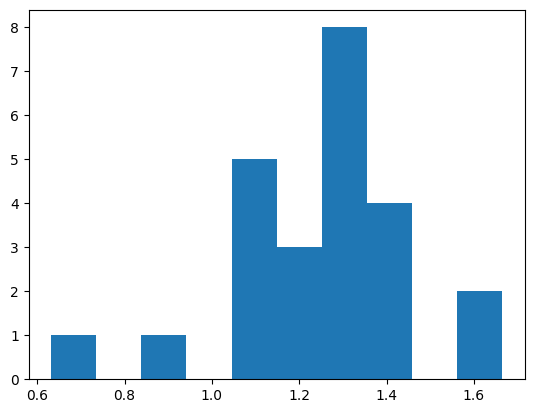

In [6]:
L_list = [tree.L for tree in sampler.saved_trees[0]]
plt.hist(L_list)
plt.show()

In [ ]:
# MAP_tree = Phylo.read("analyses\\primates_cytb_JC_MAP.tree", "nexus")

# for clade in MAP_tree.find_clades():
#     if type(clade.branch_length) == str:
#         bl = float(clade.branch_length[:8])
#         clade.branch_length = bl

# print(MAP_tree)
# # terminal_branch_lengths = np.array([clade.branch_length for clade in MAP_tree.get_terminals()])
# # internal_branch_lengths = np.array([clade.branch_length for clade in MAP_tree.get_nonterminals()])


# # bins = np.linspace(0, 0.3, 30)
# # plt.hist(terminal_branch_lengths, bins, alpha=0.5, label='terminal')
# # plt.hist(internal_branch_lengths, bins, alpha=0.5, label='internal')
# # plt.legend(loc='upper right')
# # plt.show()


# Phylo.draw(MAP_tree)

# MAP_tree.rooted = True
# # for clade in MAP_tree.find_clades():
# #     print(clade.clades)

# outgroup = ["Galeopterus_variegatus"]#, 0.050508999999999964]

# # Root the tree using the specified outgroup
# MAP_tree.root_with_outgroup(outgroup)
# # MAP_tree.root_at_midpoint()
# Phylo.draw(MAP_tree)

In [ ]:
# # Draw multiple overlapping trees TODO

# fig, ax = plt.subplots(figsize=(6,6))
# Phylo.draw(true_tree, axes=ax, do_show=False)
# Phylo.draw(tree_init, axes=ax)
# plt.show()

In [ ]:
taxa_names = ["Saimiri_sciureus", "Callicebus_donacophilus", "Cebus_albifrons", "Aotus_trivirgatus", "Hylobates_lar", "Pan_paniscus"]

tree_random = Phylogenetic_Tree().generate_random_topology(taxa_names=taxa_names)
# tree_random.generate_random_branch_lengths(distribution="uniform", type="ultrametric")
tree_random.draw(figsize=(10,6))